In [1]:
import torch
from repop import dataset,params2theta,theta2params,plot_sci_not
import pandas as pd
from matplotlib import pyplot as plt
from synth_data import cases

In [2]:
def load_dataset(filename,Nmax=10**10,remove_zeros=True,cutoff=50):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils,cutoff)

In [3]:
case = cases.casem1
,sharex='case = cases.casem2
th_gt = params2theta(*torch.tensor((case.mus,case.sigs,case.rhos)))

/tmp/ipykernel_13173/665987814.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1724789143830/work/torch/csrc/utils/tensor_new.cpp:278.)
  th_gt = params2theta(*torch.tensor((case.mus,case.sigs,case.rhos)))


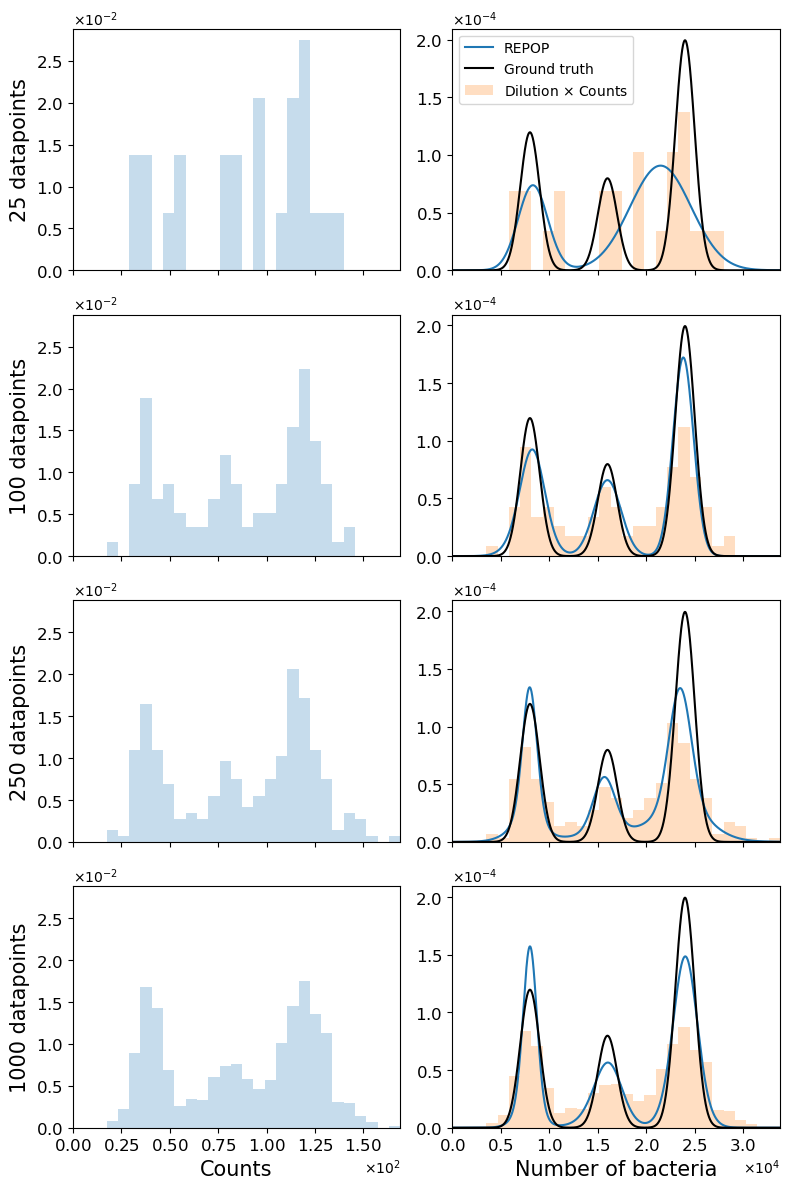

In [4]:
fig,axs = plt.subplots(4,2,figsize=(8,3*4),sharex='col') 

first = True
for Nmax, axi in zip(reversed((25, 100, 250, 1000)), reversed(axs)):

    data2 = load_dataset('synth_data/synth_{}.csv'.format(case.name),Nmax=Nmax,cutoff=-1)
    
    data2.evaluate(observe=False)
    if first:
      cmax = data2.counts.max().item()+3
      bins = torch.linspace(0,cmax,30).numpy()
      dil = data2.dils[0].item()
      first = False
    data2.real_plots(axi,th_gt,bins=bins,fix_ticks=False)
    
    axi[0].set_ylabel('{} datapoints'.format(Nmax))
    axi[0].set_xlabel('')
    plot_sci_not(axi)

    del data2.lpkdil_n
    del data2

ticks = torch.arange(0,cmax+24,25).numpy()


# [(ax[0].set_xticks(ticks), ax[1].set_xticks(ticks*dil)) for ax in axs]
# [(ax[1].set_xlim((0,cmax*dil)), ax[0].set_xlim((0,cmax))) for ax in axs]

ymax = max([ax[0].get_ylim()[-1] for ax in axs])
[(ax[0].set_ylim((0,ymax))) for ax in axs]

axs[-1][0].set_xlabel('Counts',fontsize=15)
axs[-1][1].set_xlabel('Number of bacteria',fontsize=15)
axi[0].set_xticks(ticks) , axi[1].set_xticks(ticks*dil)
axi[0].set_xlim((0,cmax)), axi[1].set_xlim((0,cmax*dil))
axs[0][1].legend()

plt.tight_layout()
fig.savefig('graphs/synth/{}_all.png'.format(case.name),dpi=900)

In [5]:
data2 = load_dataset('synth_data/synth_{}.csv'.format(case.name),Nmax=Nmax,cutoff=-1)
    

In [6]:
max([ax[0].get_ylim()[-1] for ax in axs])

0.0288284166827042